# studying statistics of the sparse edges from natural images for different image classes

We extracted sparse edge in natural images and here we explore for 2 sets of images some classical statistical measures on these sets.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run EUVIP_1_defaults.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213]
Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Final sparseness in the representation = 0.0026041666666666665
Final sparseness in the pyramid = 0.375


In [3]:
%cd -q ../test/

## retrieving data

In [4]:
for exp, name_database in zip(['EUVIP-sparseness', 'EUVIP-sparseness'], ['serre07_distractors', 'serre07_distractors']):
    print ('DATABASE ', name_database)
    imagelist, edgeslist, RMSE = mp.process(exp, name_database=name_database)
    print('edgeslist shape = ', edgeslist.shape)
    N_image = edgeslist.shape[2]
    for i_image in range(N_image):
        filename, croparea = imagelist[i_image]
        #image, filename_, croparea_ = im.patch(name_database=name_database, filename=filename, croparea=croparea)
        #print 'Image ', filename, croparea, image.std(), image.mean()#, filename_, croparea_

DATABASE  serre07_distractors
edgeslist shape =  (6, 4096, 100)
DATABASE  serre07_distractors
edgeslist shape =  (6, 4096, 100)


In [5]:
imagelist, edgeslist_targets, RMSE = mp.process(exp='EUVIP-sparseness', name_database='serre07_distractors') 
# HACK! serre07_targets')
imagelist, edgeslist_distractors, RMSE = mp.process(exp='EUVIP-sparseness', name_database='serre07_distractors')

In [6]:
value_distractors = edgeslist_distractors[4, :, :]
phase_distractors = edgeslist_distractors[5, :, :]

In [7]:
value_targets = edgeslist_targets[4, :, :]
phase_targets = edgeslist_targets[5, :, :]

In [8]:
indices = np.ones((value_targets.shape[0], 1)) * (np.arange(value_targets.shape[1])[np.newaxis, :])

### Sparseness:

overall sparseness:

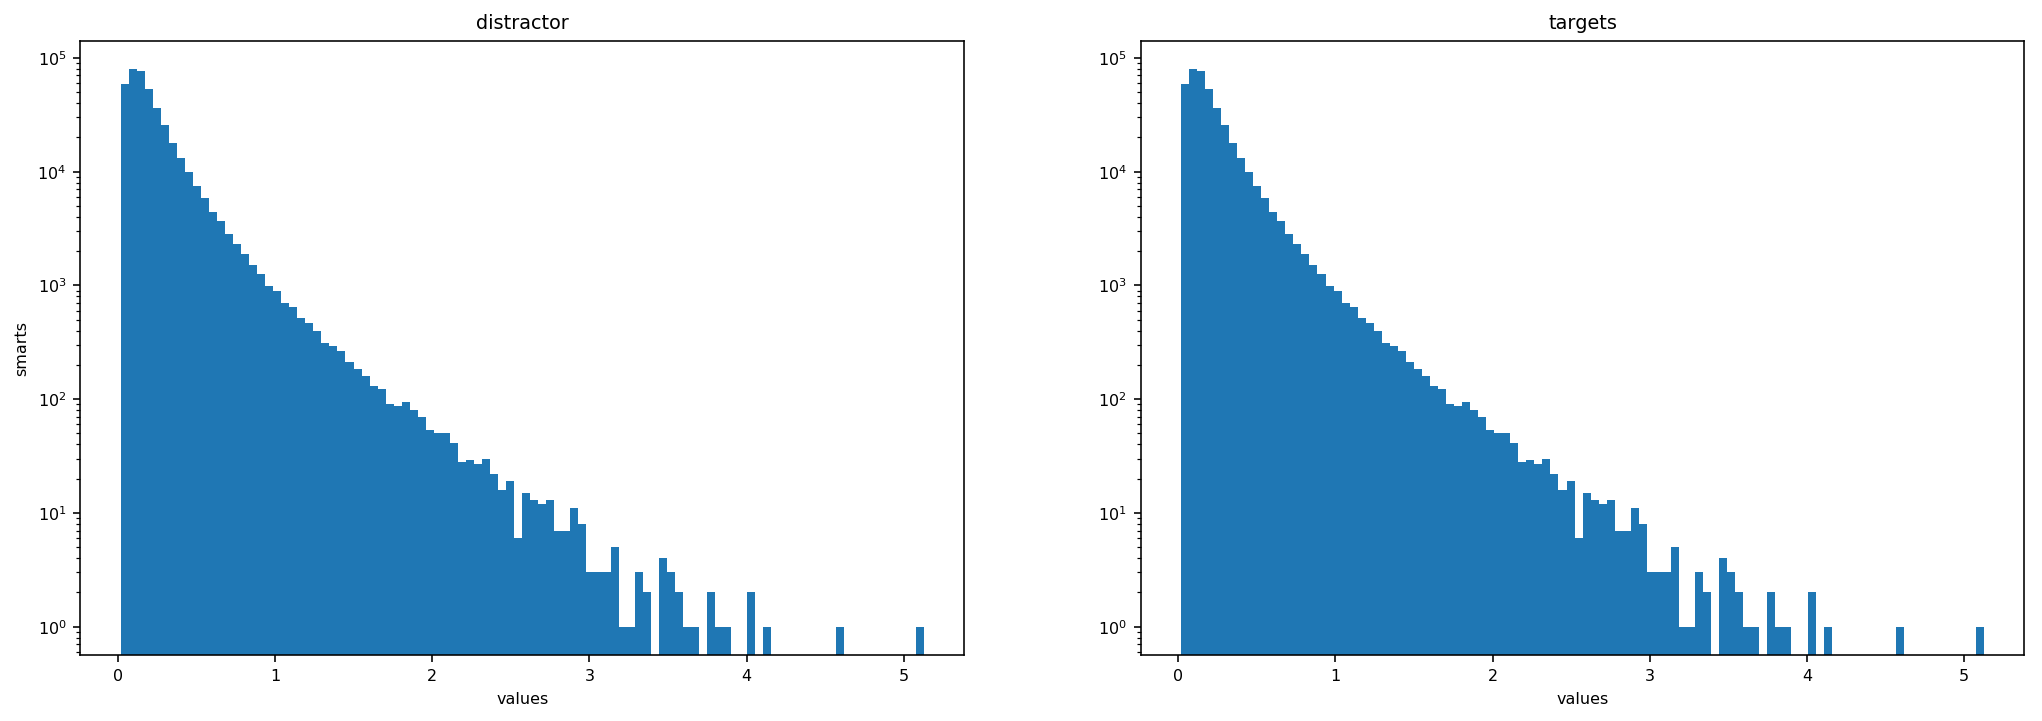

In [9]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('values'); ax2.set_xlabel('values'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(value_distractors.ravel(), 100, log=True)
_ = ax2.hist(value_targets.ravel(), 100, log=True)

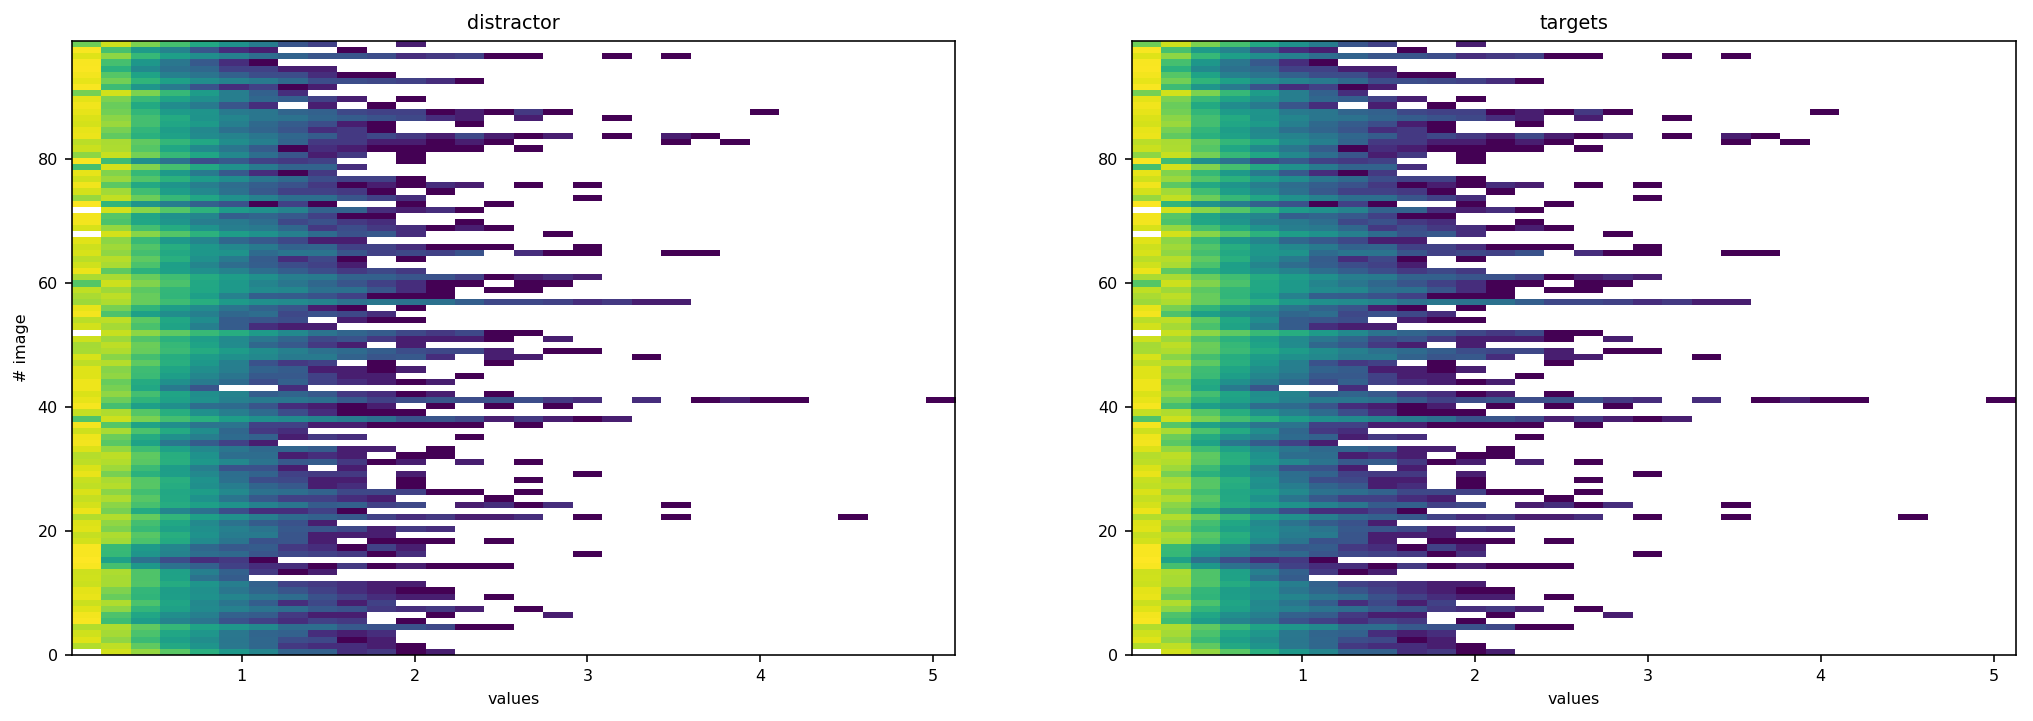

In [10]:
fig = plt.figure(figsize=(18, 6))
import matplotlib
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('values'); ax2.set_xlabel('values'); ax1.set_ylabel('# image')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(value_distractors.ravel(), indices.ravel(), [30, value_distractors.shape[1]], norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(value_targets.ravel(), indices.ravel(), [30, value_targets.shape[1]], norm=matplotlib.colors.LogNorm())

Sparseness score

In [11]:
print ('energy ', [np.sqrt((Value**2).mean()) for Value in [value_distractors, value_targets]])
print ('mean ', [Value.mean() for Value in [value_distractors, value_targets]])
print ('median ', [np.median(Value) for Value in [value_distractors, value_targets]])
print ('sparseness ', [Value.mean()/np.median(Value) for Value in [value_distractors, value_targets]])
#plt.hist?

energy  [0.31821809582324467, 0.31821809582324467]
mean  [0.22679932047620086, 0.22679932047620086]
median  [0.16191300625300878, 0.16191300625300878]
sparseness  [1.4007480048996146, 1.4007480048996146]


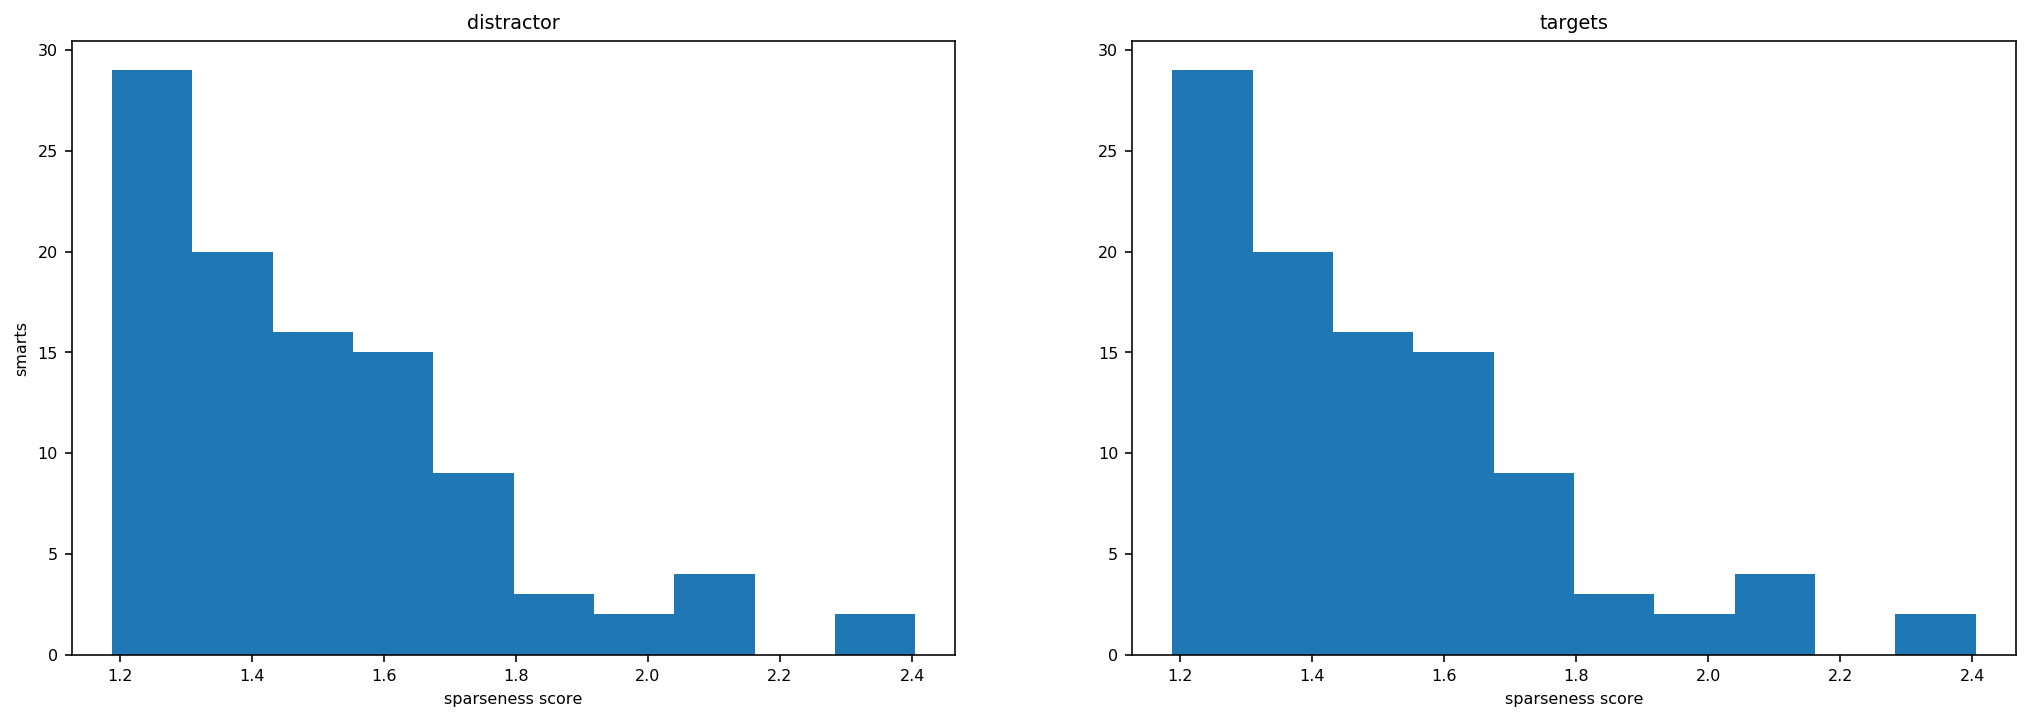

In [12]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('sparseness score'); ax2.set_xlabel('sparseness score'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(value_distractors.mean(axis=0)/np.median(value_distractors, axis=0))
_ = ax2.hist(value_targets.mean(axis=0)/np.median(value_targets, axis=0))

## statistics of phase (symmetric vs anti-symmetric)

Deviation from uniform =  1.05866847417


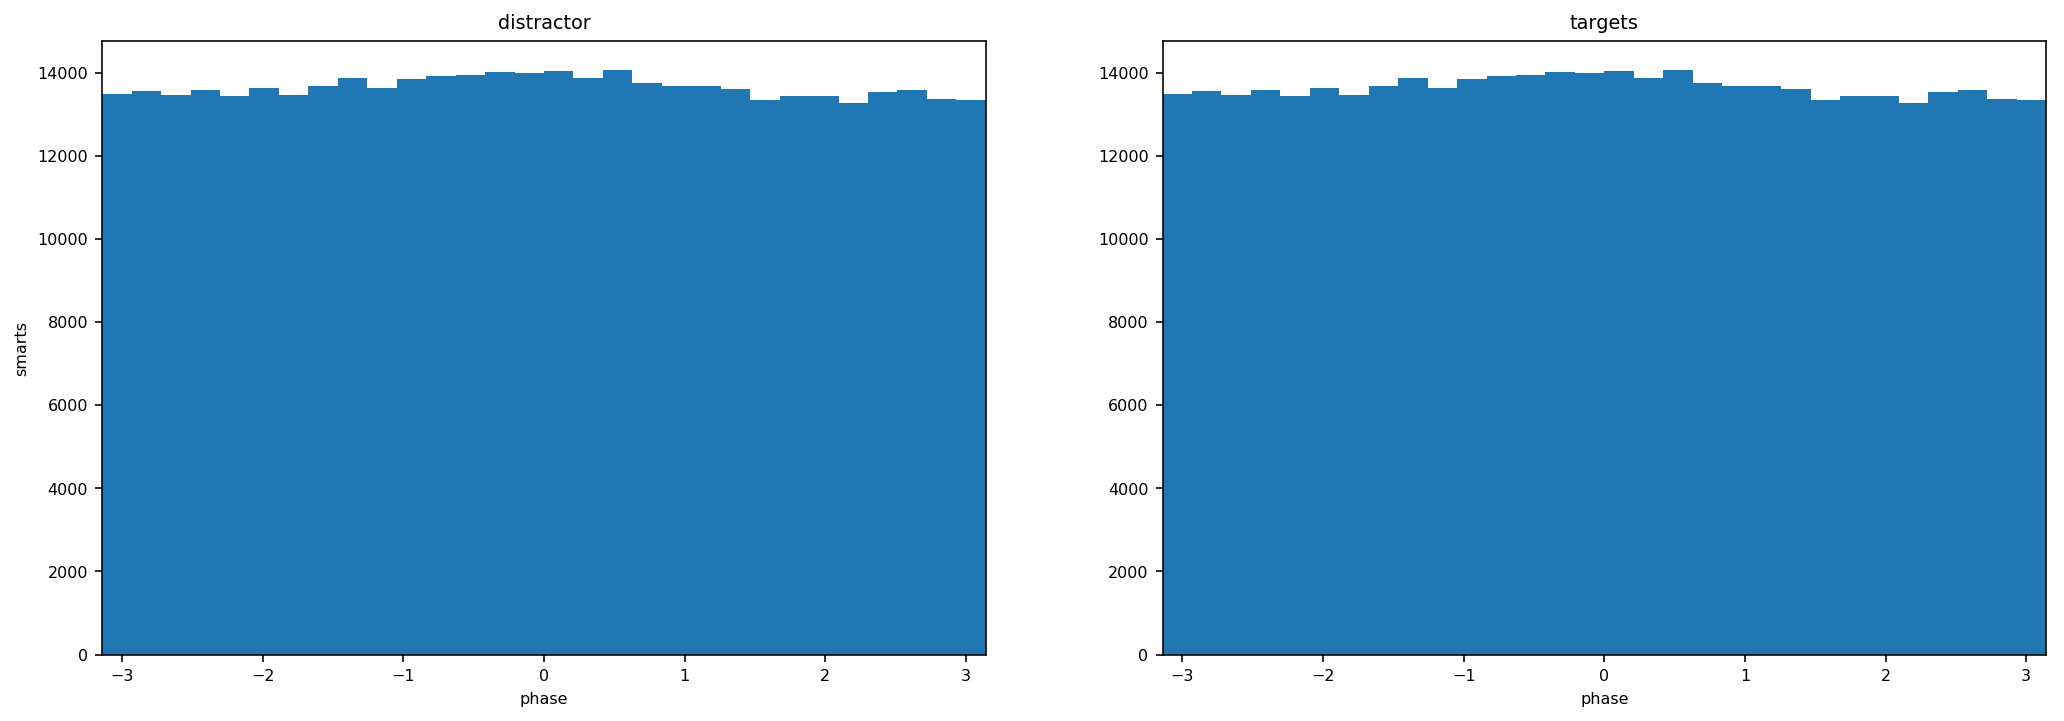

In [13]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase'); ax2.set_xlabel('phase'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(phase_distractors.ravel(), 30)
ax1.set_xlim([-np.pi, np.pi])
(n, bins, patches)= ax2.hist(phase_targets.ravel(), 30, log=False)
ax2.set_xlim([-np.pi, np.pi])
print ('Deviation from uniform = ',np.max(n)/np.min(n))

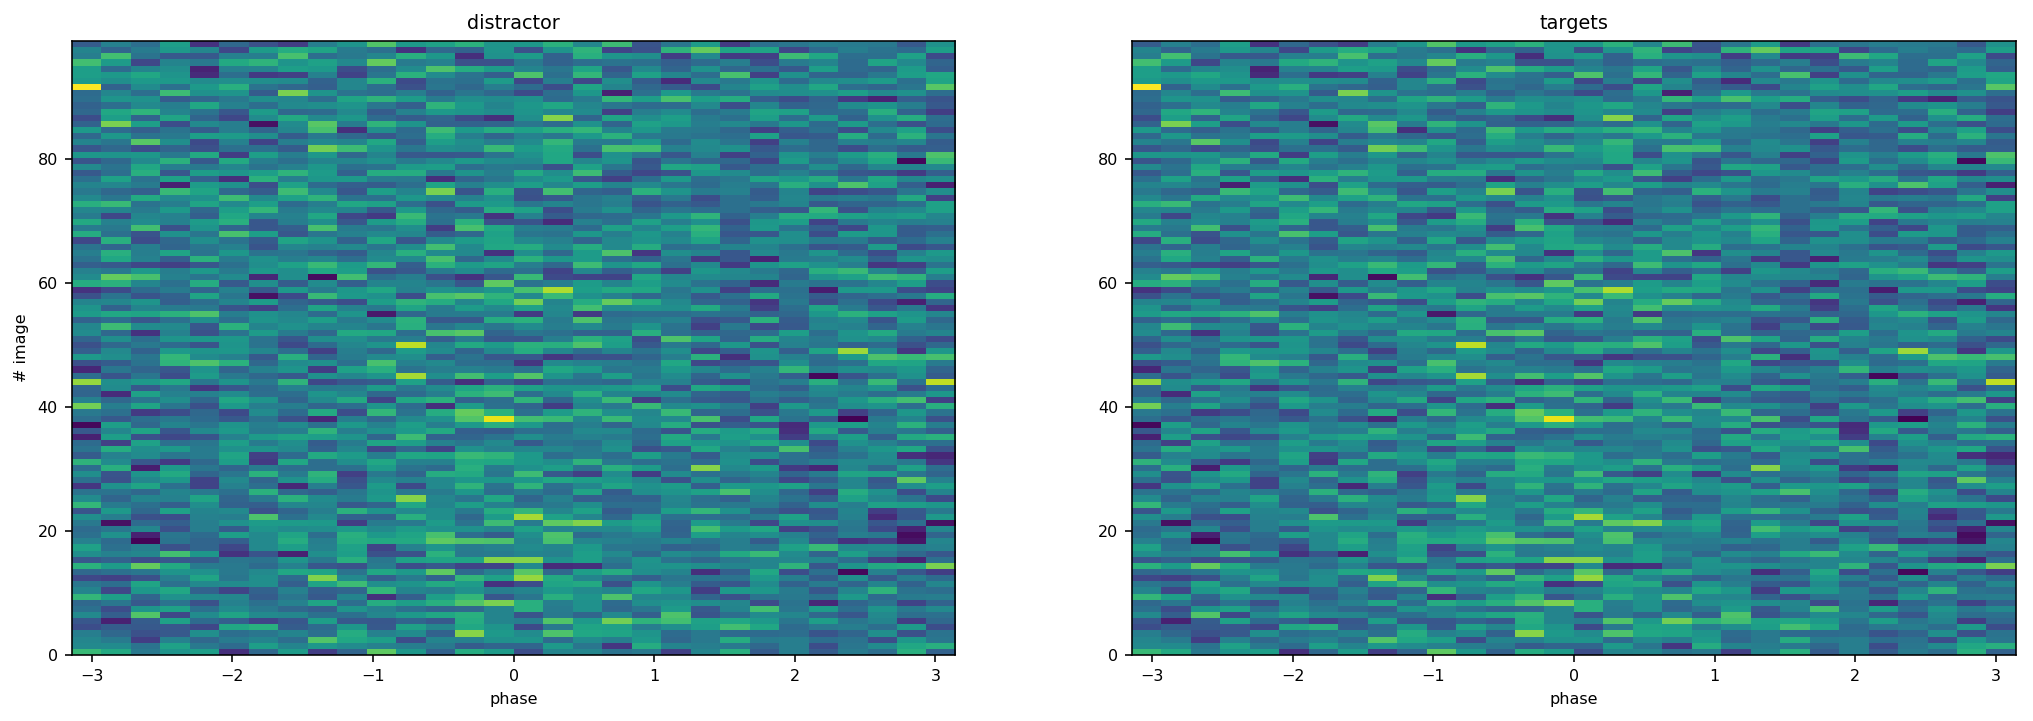

In [14]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase'); ax2.set_xlabel('phase'); ax1.set_ylabel('# image')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(phase_distractors.ravel(), indices.ravel(), [30, value_distractors.shape[1]])
_ = ax2.hist2d(phase_targets.ravel(), indices.ravel(), [30, value_targets.shape[1]])

There seems to be no preferred phase.

##  dependency between value and phase

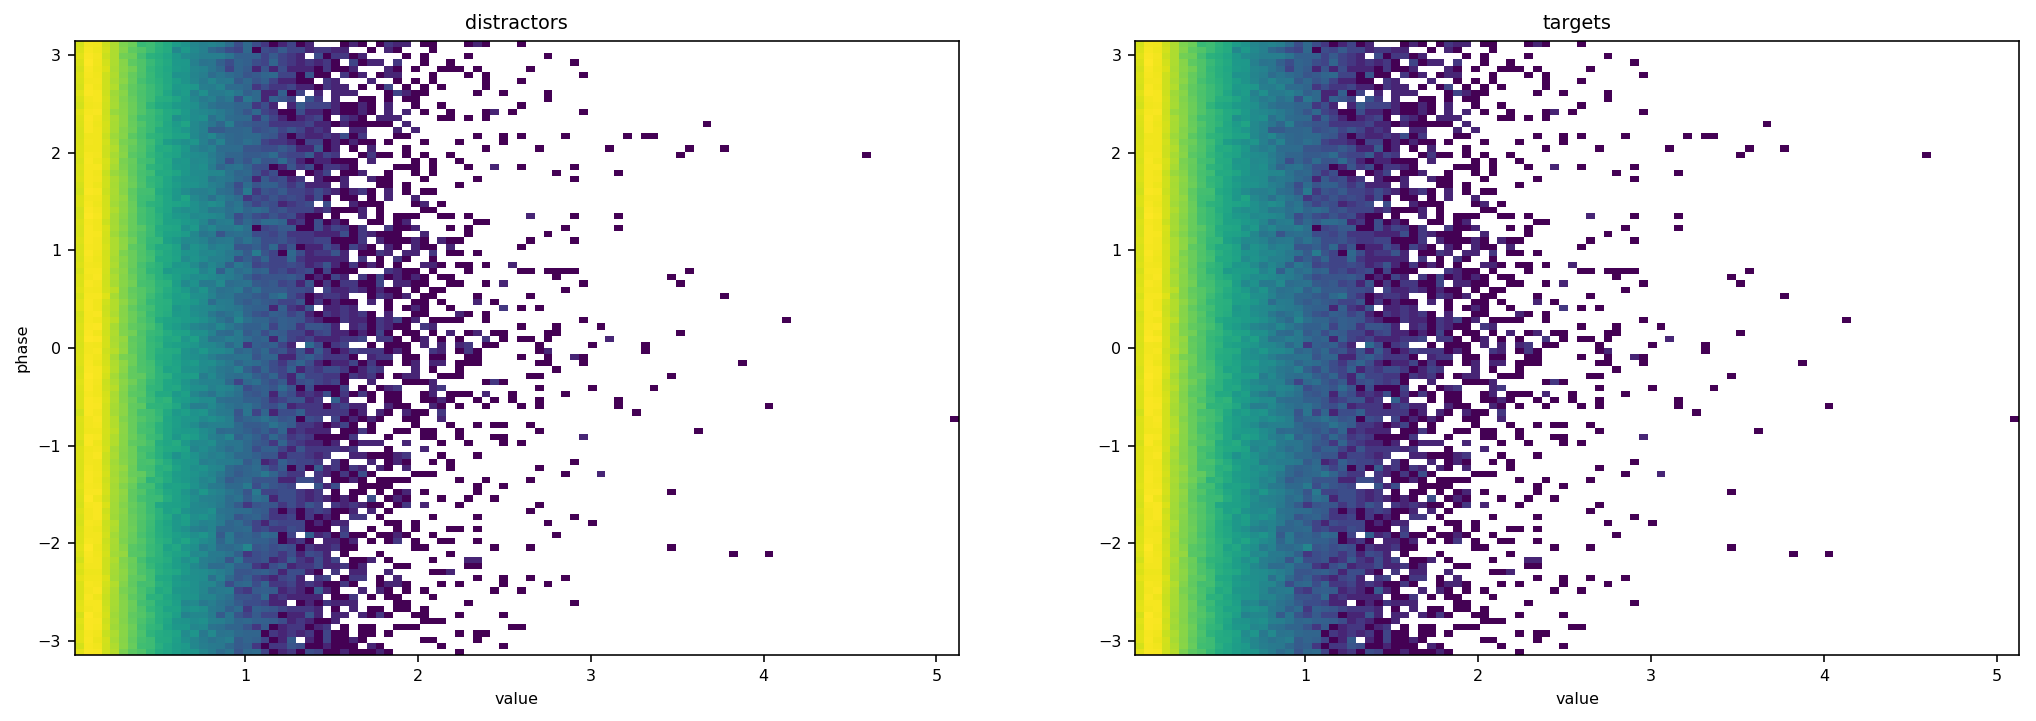

In [15]:
import matplotlib
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('value'); ax2.set_xlabel('value'); ax1.set_ylabel('phase')
ax1.set_title('distractors'); ax2.set_title('targets')
_ = ax1.hist2d(value_distractors.ravel(), phase_distractors.ravel(), 100, norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(value_targets.ravel(), phase_targets.ravel(), 100, norm=matplotlib.colors.LogNorm())


but not specific to a class:

In [16]:
#fig = plt.figure(figsize=(18, 6))
#ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
#ax1.set_xlabel('sparseness score'); ax2.set_xlabel('sparseness score'); ax1.set_ylabel('smarts')
#ax1.set_title('distractor'); ax2.set_title('targets')
#_ = ax1.hist2d(Value_distractors.mean(axis=0)/np.median(Value_distractors, axis=0), 100)
#_ = ax2.hist2d(Value_targets.mean(axis=0)/np.median(Value_targets, axis=0), 100)

## relation between activity and scale

relation between sparseness and scale

[-7.6363 -6.9421 -6.2479 -5.5537 -4.8595 -4.1653 -3.4711 -2.7768 -2.0826
 -1.3884 -0.6942]


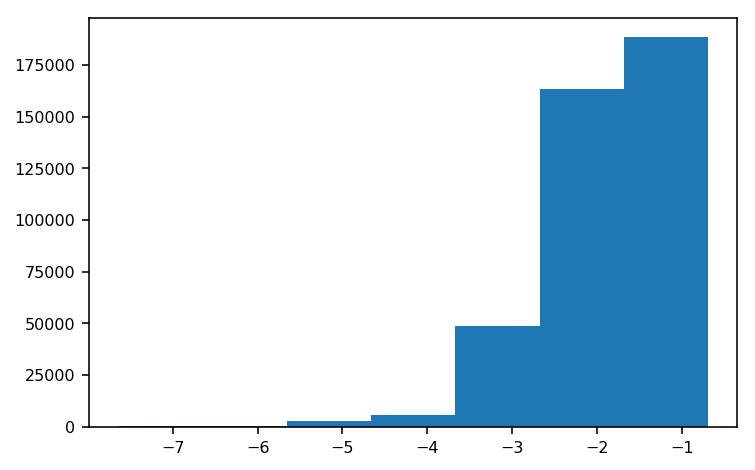

In [17]:
sf_targets = edgeslist_targets[3, :, :].real
print (np.unique(np.log2(sf_targets).ravel()))
_ = plt.hist(np.log2(sf_targets).ravel(), 7)

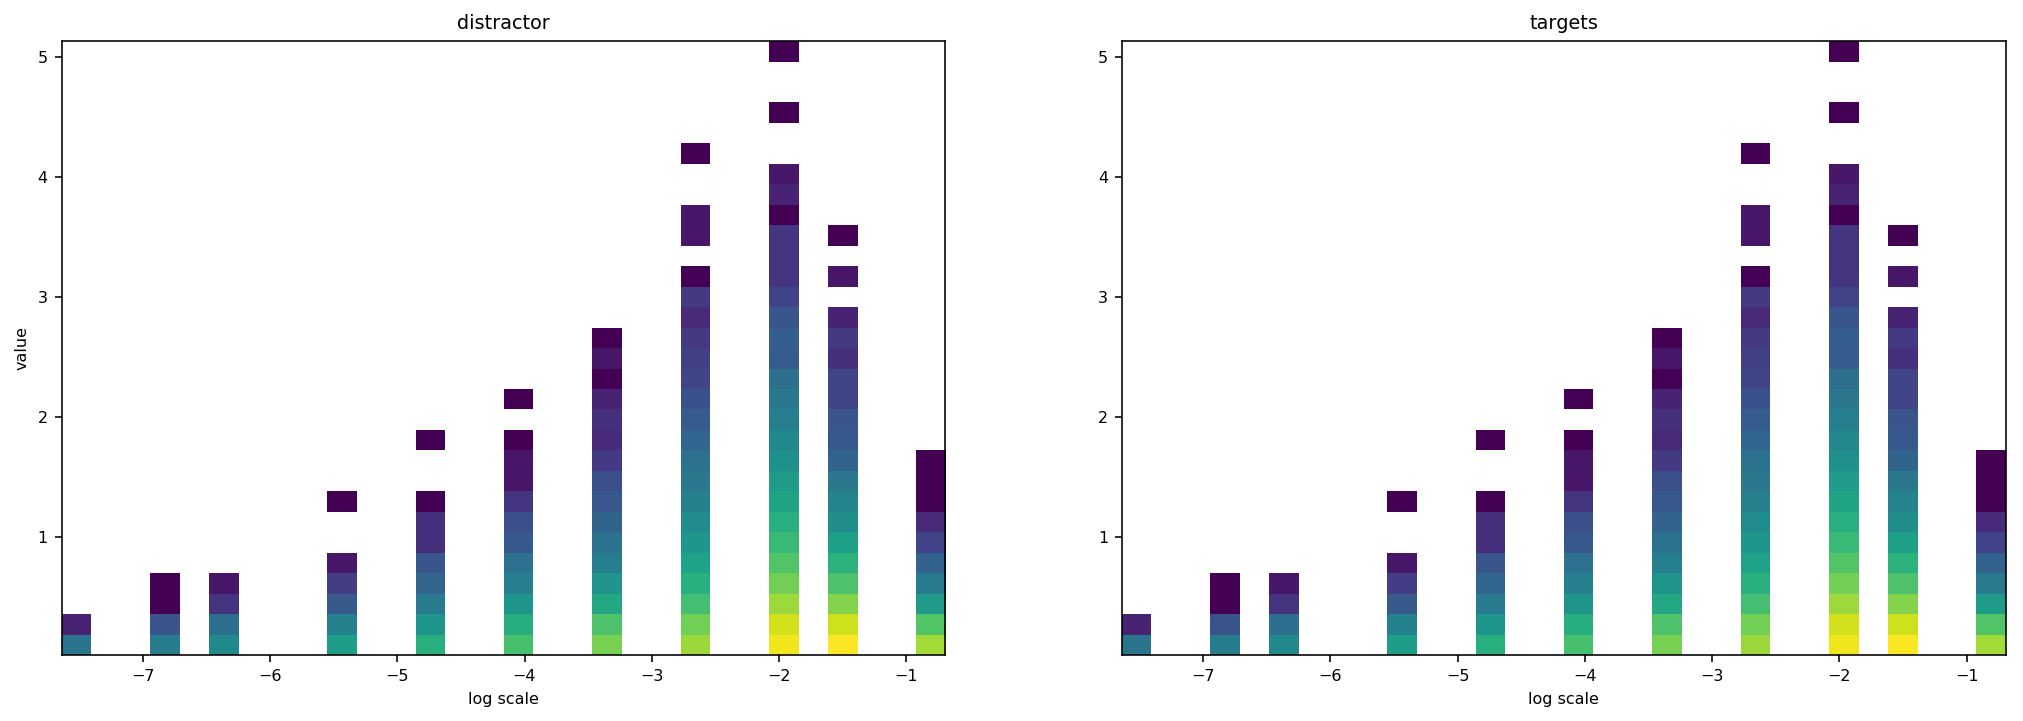

In [18]:
sf_targets = np.log2(edgeslist_targets[3, :, :].real)
sf_distractors = np.log2(edgeslist_distractors[3, :, :].real)
#_ = plt.scatter(np.log2(sf_targets).ravel(), (np.absolute(Value_targets)).ravel())
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_ylabel('value'); ax2.set_xlabel('log scale'); ax1.set_xlabel('log scale')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(sf_targets.ravel(), value_distractors.ravel(), 30, norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(sf_distractors.ravel(), value_targets.ravel(), 30, norm=matplotlib.colors.LogNorm())


These plots show that as expected lower scales are less numerous than small edges, consistant with a multi-scale (wavelet) decomposition.

## Angles

In [19]:
theta_targets = edgeslist_targets[2, :, 0].ravel().real
theta_distractors = edgeslist_distractors[2,  :, 0].ravel().real
mp.init_binedges()
print (mp.binedges_theta * 180 / np.pi)
print (theta_targets * 180 / np.pi)

[-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
[ 82.5 -30.   90.  ..., -45.  -67.5  75. ]


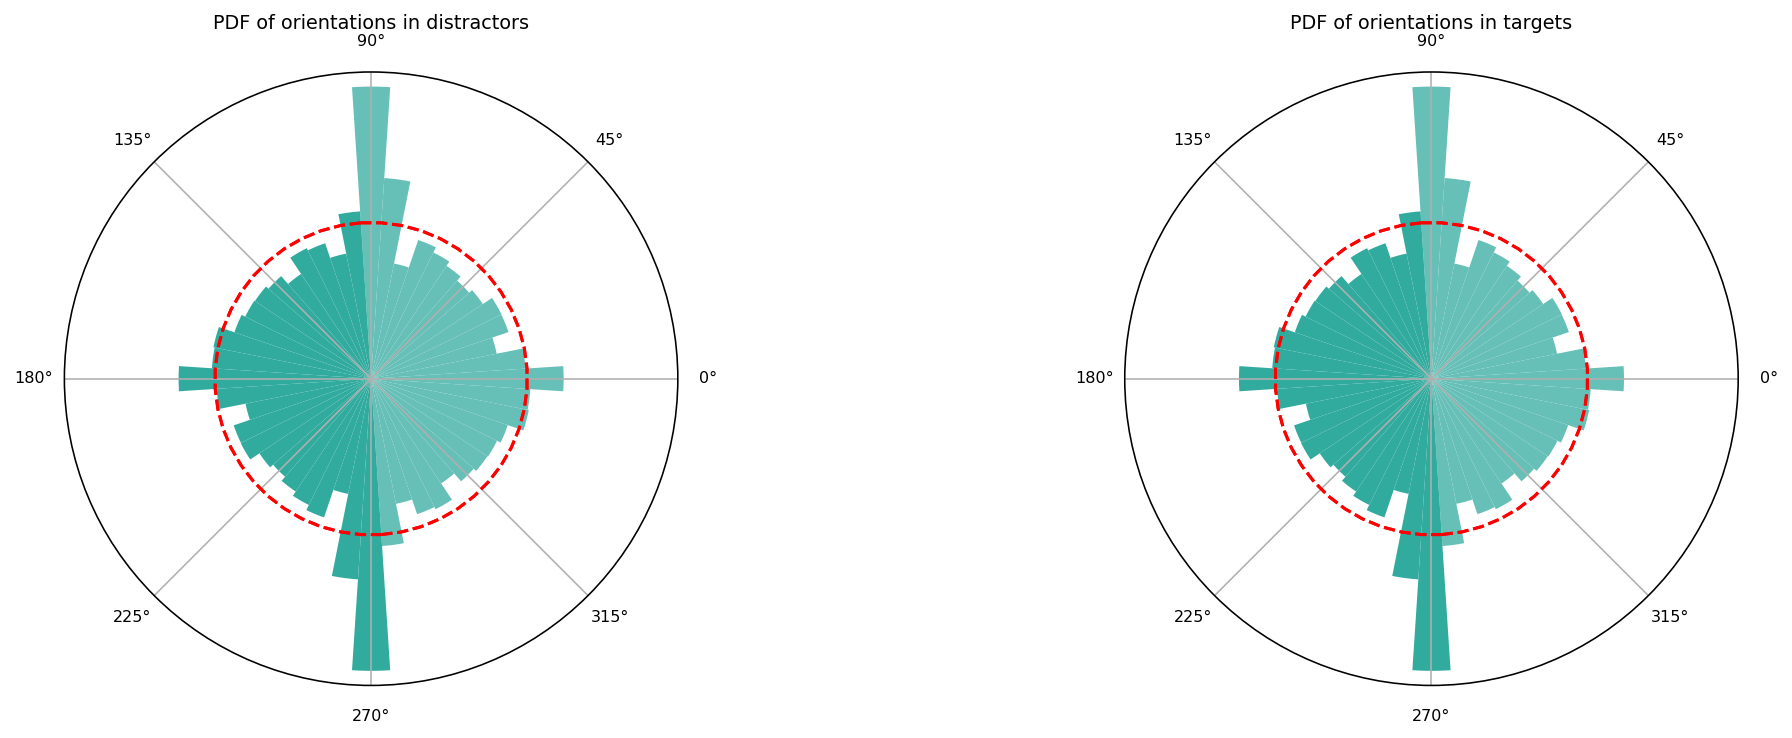

In [20]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121, polar=True, axisbg='w'); ax2 = fig.add_subplot(122, polar=True, axisbg='w')
ax1.set_title('PDF of orientations in distractors'); ax2.set_title('PDF of orientations in targets')

fig, ax1 = mp.histedges_theta(edgeslist_targets, fig=fig, ax=ax1)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist_targets, display=False)
ax1.plot(v_theta_edges, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')
ax1.plot(v_theta_edges+np.pi, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')

fig, ax2 = mp.histedges_theta(edgeslist_distractors, fig=fig, ax=ax2)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist_distractors, display=False)
ax2.plot(v_theta_edges, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')
ax2.plot(v_theta_edges+np.pi, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--');

## some book keeping for the notebook

In [21]:
%load_ext watermark
%watermark

2017-02-06T16:51:02+01:00

CPython 3.6.0
IPython 5.2.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [22]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.2.1
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.12.0
scipy 0.18.1
matplotlib 2.0.0
sympy 1.0
Mon Feb 06 16:51:03 2017 CET

In [23]:
%cd -q ../notebooks/